In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import Image
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import time
import random
%matplotlib inline

In [0]:
from __future__ import print_function, division

import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms

In [0]:
train_Aug = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),    
                                            torchvision.transforms.RandomRotation((-20, 20)),  
                                            torchvision.transforms.RandomAffine(0, translate=None, scale=[0.7, 1.3], shear=None, resample=False, fillcolor=0), 
                                            torchvision.transforms.ToTensor()])
test_Aug = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),  
                                           torchvision.transforms.ToTensor()])

In [0]:
base_dir = "/content/drive/My Drive/chest_xray_covid19_dataset"
os.listdir(base_dir)

['covid', 'normal']

In [0]:
trainset = torchvision.datasets.ImageFolder(base_dir,transform = train_Aug)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=3, shuffle=True, num_workers=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
class_names = trainset.classes
len(class_names)

2

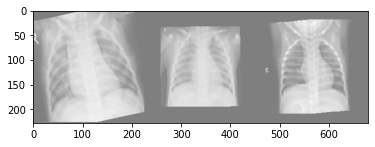

In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [0]:
my_resnet_model = models.resnet18(pretrained=True)

num_features = my_resnet_model.fc.in_features
my_resnet_model.fc = nn.Linear(num_features, 2)

In [0]:
my_resnet_model = my_resnet_model.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(my_resnet_model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [0]:
num_epochs = 10
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0): 
        exp_lr_scheduler.step()
        my_resnet_model.train()  # Set model to training mode
        
        for inputs, labels in trainloader:
                inputs = inputs.to(device) 
                labels = labels.to(device)
                
                optimizer_ft.zero_grad()
                outputs = my_resnet_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer_ft.step()
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # correct += (outputs == labels).float().sum()
        print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, loss.item(), correct/total))

print('Finished Training')

Epoch 1/10, Loss: 0.823, Accuracy: 0.920
Epoch 1/10, Loss: 0.724, Accuracy: 0.880
Epoch 1/10, Loss: 0.002, Accuracy: 0.860
Epoch 1/10, Loss: 0.001, Accuracy: 0.870
Epoch 1/10, Loss: 0.004, Accuracy: 0.868
Epoch 1/10, Loss: 0.676, Accuracy: 0.863
Epoch 1/10, Loss: 0.004, Accuracy: 0.863
Epoch 1/10, Loss: 0.003, Accuracy: 0.868
Epoch 1/10, Loss: 0.001, Accuracy: 0.876
Epoch 1/10, Loss: 0.001, Accuracy: 0.876
Epoch 1/10, Loss: 0.674, Accuracy: 0.873
Epoch 1/10, Loss: 0.004, Accuracy: 0.872
Epoch 1/10, Loss: 0.009, Accuracy: 0.872
Epoch 1/10, Loss: 0.932, Accuracy: 0.874
Epoch 1/10, Loss: 0.001, Accuracy: 0.883
Epoch 1/10, Loss: 0.003, Accuracy: 0.881
Epoch 1/10, Loss: 0.911, Accuracy: 0.876
Epoch 2/10, Loss: 0.007, Accuracy: 0.860
Epoch 2/10, Loss: 1.198, Accuracy: 0.900
Epoch 2/10, Loss: 0.783, Accuracy: 0.880
Epoch 2/10, Loss: 0.001, Accuracy: 0.895
Epoch 2/10, Loss: 0.001, Accuracy: 0.888
Epoch 2/10, Loss: 0.011, Accuracy: 0.887
Epoch 2/10, Loss: 0.898, Accuracy: 0.886
Epoch 2/10, Loss